In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
#Load the csv dataset to Pandas Data frame 
gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
# Data processing
# Print first five rows in data set
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print the last five rows of data frame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# Number of rows and columns in dataset
gold_data.shape

(2290, 6)

In [6]:
 gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# Cherk the number of missing value 
gold_data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Date    SPX    GLD    USO    SLV  EUR/USD
0     False  False  False  False  False    False
1     False  False  False  False  False    False
2     False  False  False  False  False    False
3     False  False  False  False  False    False
4     False  False  False  False  False    False
...     ...    ...    ...    ...    ...      ...
2285  False  False  False  False  False    False
2286  False  False  False  False  False    False
2287  False  False  False  False  False    False
2288  False  False  False  False  False    False
2289  False  False  False  False  False    False

[2290 rows x 6 columns]>

In [8]:
# Statistical measure of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
# Finding Correlations between columns
correlation = gold_data.corr()


C:\Users\Dell\AppData\Local\Temp\ipykernel_17316\2581505629.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<AxesSubplot: >

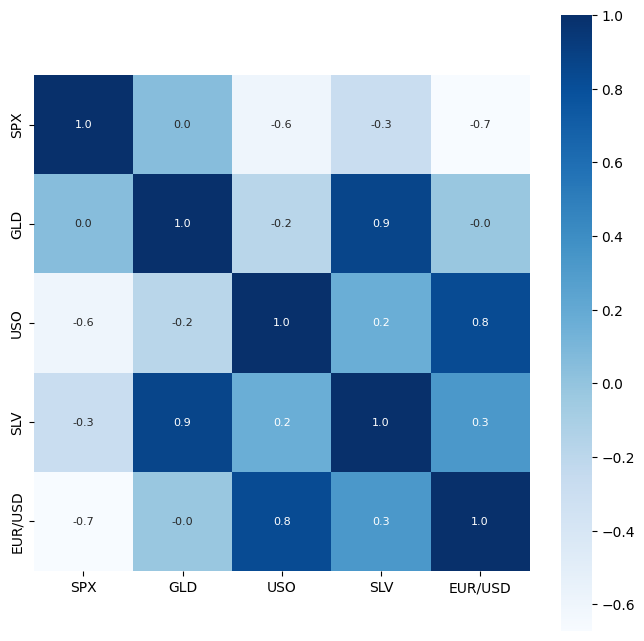

In [10]:
# Understanding correlation using heatmap
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
 # correlation values of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_17316\1212324281.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<AxesSubplot: xlabel='GLD', ylabel='Density'>

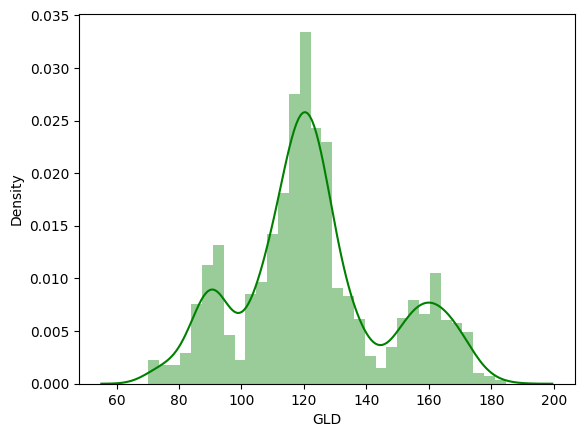

In [12]:
# Distribution of Gold Price
sns.distplot(gold_data['GLD'], color='green')

In [13]:
# Splitting the Features and the Target
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [16]:
# Splitting into Training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [17]:
# Model Training
# Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [19]:
# Model Evaluation 
# prediction using test data

test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[168.39889956  82.1381999  115.86410015 127.65400064 120.75770128
 154.90959805 150.70719902 126.0002005  117.35299886 126.07510027
 116.45620085 171.69000059 141.5329993  167.86319852 115.02229988
 117.71340065 138.79830293 170.35660127 158.89840223 160.79499947
 155.22330027 125.41300008 175.83500029 157.19280382 125.19750048
  93.6694999   77.17100029 120.59710005 119.03469896 167.51539942
  88.20710035 125.27390009  91.23560048 117.68540003 121.25389901
 135.97900044 115.79320123 114.70180082 147.47120011 107.435001
 104.35750257  87.23609803 126.40780055 117.8984999  152.02239946
 119.7391002  108.46589967 108.53889813  93.21470032 127.03209795
  75.39160003 113.69639917 121.35200008 111.25339926 118.90969901
 120.84169975 160.15100116 168.5214015  146.92069717  85.98149873
  93.97250039  86.82069901  90.65250033 118.90980071 126.47470048
 127.57969978 170.60180031 122.32409955 117.33789913  98.61150012
 168.55930118 143.07549826 131.75770248 121.19940246 121.35229927
 119.6834007

In [21]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9895434622401388


In [22]:
# Compare the actual value and predicted values in a plot
#convert to list
Y_test = list(Y_test)

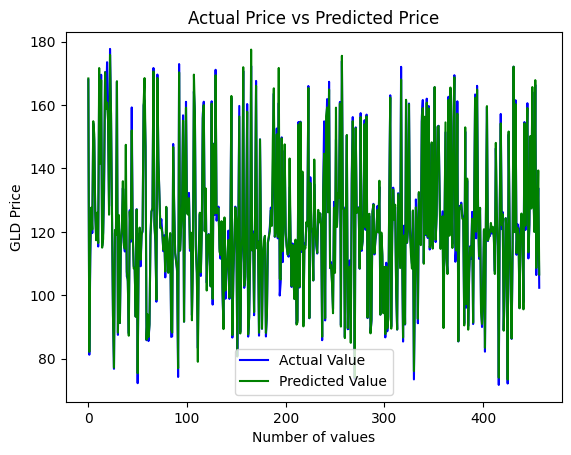

In [23]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()